In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('../data/obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [25]:
#Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
#Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical columns : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [26]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib
le = LabelEncoder()
joblib.dump(le,"labelEncoder.pkl")
df['Gender'] = le.fit_transform(df['Gender'])
df['family_history_with_overweight']=le.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = le.fit_transform(df['FAVC'])
df['CAEC'] = le.fit_transform(df['CAEC'])
df['SMOKE'] = le.fit_transform(df['SMOKE'])
df['SCC']= le.fit_transform(df['SCC'])
df['CALC'] = le.fit_transform(df['CALC'])
df['MTRANS'] = le.fit_transform(df['MTRANS'])

df['NObeyesdad'] = df['NObeyesdad'].replace(
    {"Insufficient_Weight":0, "Normal_Weight":1,"Overweight_Level_I":2,"Overweight_Level_II":3,
     "Obesity_Type_I":4,"Obesity_Type_II":5,"Obesity_Type_III":6})

df

/tmp/ipykernel_2480/2793663805.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['NObeyesdad'] = df['NObeyesdad'].replace(


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.00,1,0,2.0,3.0,2,0,2.00,0,0.00,1.000,3,3,1
1,0,21,1.52,56.00,1,0,3.0,3.0,2,1,3.00,1,3.00,0.000,2,3,1
2,1,23,1.80,77.00,1,0,2.0,3.0,2,0,2.00,0,2.00,1.000,1,3,1
3,1,27,1.80,87.00,0,0,3.0,3.0,2,0,2.00,0,2.00,0.000,1,4,2
4,1,22,1.78,89.80,0,0,2.0,1.0,2,0,2.00,0,0.00,0.000,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,2,0,1.73,0,1.68,0.906,2,3,6
2107,0,22,1.75,133.74,1,1,3.0,3.0,2,0,2.01,0,1.34,0.599,2,3,6
2108,0,23,1.75,133.69,1,1,3.0,3.0,2,0,2.05,0,1.41,0.646,2,3,6
2109,0,24,1.74,133.35,1,1,3.0,3.0,2,0,2.85,0,1.14,0.586,2,3,6


In [27]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df.dropna()
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21,1.71,75.00,1,1,2.00,3.00,2,0,1.33,0,1.00,0.000,2,3,2
1,0,26,1.64,110.97,1,1,3.00,3.00,2,0,2.64,0,0.00,0.358,2,3,6
2,0,21,1.74,150.38,1,1,3.00,3.00,2,0,2.32,0,1.58,0.681,2,3,6
3,1,31,1.76,119.37,1,1,2.97,3.00,2,0,2.83,0,0.45,1.916,2,0,5
4,0,44,1.58,80.99,1,1,2.19,2.90,2,0,2.47,0,0.26,0.000,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.55,50.00,0,1,2.00,3.00,2,0,2.00,0,0.00,0.000,2,3,1
2107,1,25,1.80,120.99,1,1,2.48,3.00,2,0,2.95,0,1.87,0.100,2,3,5
2108,1,39,1.77,118.53,1,1,2.18,2.99,2,0,1.75,0,0.66,0.000,2,0,5
2109,1,26,1.66,90.00,1,1,2.00,3.00,2,0,3.00,0,0.67,0.505,2,0,4


In [28]:
df.to_csv('../data/obesity_encoded.csv', index=False)

In [29]:
df1 = pd.read_csv('../data/obesity_encoded.csv')
df1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21,1.71,75.00,1,1,2.00,3.00,2,0,1.33,0,1.00,0.000,2,3,2
1,0,26,1.64,110.97,1,1,3.00,3.00,2,0,2.64,0,0.00,0.358,2,3,6
2,0,21,1.74,150.38,1,1,3.00,3.00,2,0,2.32,0,1.58,0.681,2,3,6
3,1,31,1.76,119.37,1,1,2.97,3.00,2,0,2.83,0,0.45,1.916,2,0,5
4,0,44,1.58,80.99,1,1,2.19,2.90,2,0,2.47,0,0.26,0.000,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.55,50.00,0,1,2.00,3.00,2,0,2.00,0,0.00,0.000,2,3,1
2107,1,25,1.80,120.99,1,1,2.48,3.00,2,0,2.95,0,1.87,0.100,2,3,5
2108,1,39,1.77,118.53,1,1,2.18,2.99,2,0,1.75,0,0.66,0.000,2,0,5
2109,1,26,1.66,90.00,1,1,2.00,3.00,2,0,3.00,0,0.67,0.505,2,0,4


In [30]:
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt

scaler = MinMaxScaler(feature_range=(0,1))
x = df1.drop('NObeyesdad', axis=1)
x = scaler.fit_transform(x)
y = df1['NObeyesdad']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


x


array([[1.        , 0.14893617, 0.49056604, ..., 0.        , 0.66666667,
        0.75      ],
       [0.        , 0.25531915, 0.35849057, ..., 0.179     , 0.66666667,
        0.75      ],
       [0.        , 0.14893617, 0.54716981, ..., 0.3405    , 0.66666667,
        0.75      ],
       ...,
       [1.        , 0.53191489, 0.60377358, ..., 0.        , 0.66666667,
        0.        ],
       [1.        , 0.25531915, 0.39622642, ..., 0.2525    , 0.66666667,
        0.        ],
       [0.        , 0.19148936, 0.52830189, ..., 1.        , 1.        ,
        0.75      ]], shape=(2111, 16))

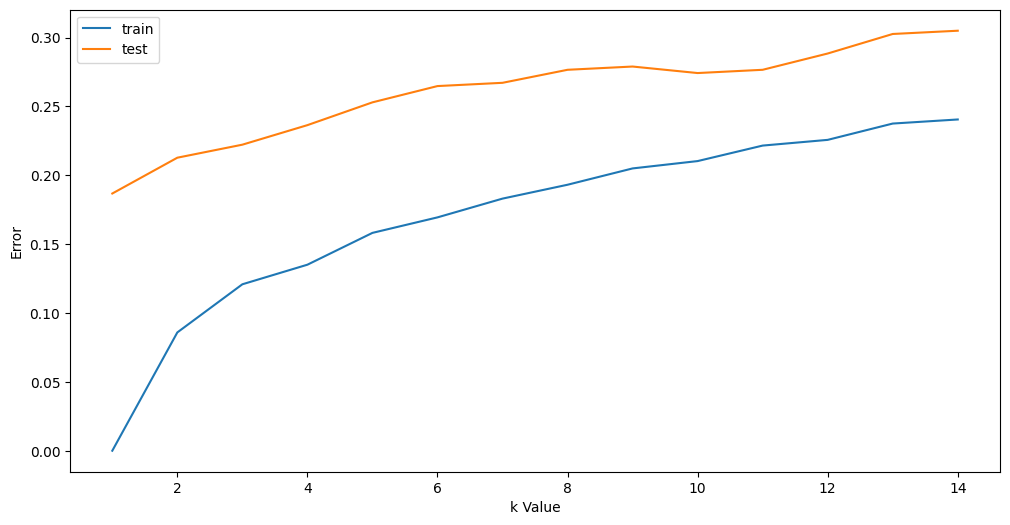

In [31]:
error1 =[]
error2 =[]
for k in range(1,15):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  y_pred1 = model.predict(x_train)
  error1.append(np.mean(y_pred1 != y_train))
  y_pred2 = model.predict(x_test)
  error2.append(np.mean(y_pred2 != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [32]:
model = KNeighborsClassifier(n_neighbors=6, weights='distance')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
cv_scores = cross_val_score(model,x_train, y_train,cv=skf, scoring='accuracy')
accuracy = accuracy_score(y_test, y_pred)


print("Cross-validation scores: ", cv_scores)
print("Mean Accuracy: ", np.mean(cv_scores))
print("Standard Deviation: ", np.std(cv_scores))
print("Accuracy: ", accuracy)
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Cross-validation scores:  [0.76923077 0.76923077 0.79585799 0.77744807 0.75667656]
Mean Accuracy:  0.7736888311414676
Standard Deviation:  0.012921064067562339
Accuracy:  0.7730496453900709

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        56
           1       0.58      0.34      0.43        56
           2       0.69      0.62      0.65        58
           3       0.74      0.86      0.79        76
           4       0.77      0.76      0.77        63
           5       0.83      0.92      0.87        48
           6       0.98      0.98      0.98        66

    accuracy                           0.77       423
   macro avg       0.76      0.77      0.76       423
weighted avg       0.76      0.77      0.76       423



In [33]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=10)
decisionTree.fit(x_train,y_train)
y_pred = decisionTree.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cv_scores = cross_val_score(decisionTree, x_train, y_train, cv=skf, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Accuracy: 0.9314420803782506

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.85      0.82      0.84        56
           2       0.84      0.90      0.87        58
           3       0.95      0.95      0.95        76
           4       0.97      0.94      0.95        63
           5       0.98      0.96      0.97        48
           6       1.00      1.00      1.00        66

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423

Cross-validation scores: [0.92899408 0.93491124 0.90828402 0.91691395 0.90207715]
Mean Accuracy: 0.918236089407055
Standard Deviation: 0.012293885557775162


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42,min_samples_split=5,min_samples_leaf=1)
rf_model.fit(x_train, y_train)
cv_scores_rf = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='accuracy')

print("Random Forest Mean Accuracy:", cv_scores_rf.mean())
print("Random Forest Std Dev:", cv_scores_rf.std())

Random Forest Mean Accuracy: 0.9526065352132461
Random Forest Std Dev: 0.01025818520760367


In [35]:
y_pred = rf_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")  # Measures how well the model fits

Mean Absolute Error (MAE): 0.0615
Mean Squared Error (MSE): 0.0946
Root Mean Squared Error (RMSE): 0.3075
R² Score: 0.9755


In [36]:
from pydantic import BaseModel
import pandas as pd

import pandas as pd


le = LabelEncoder()
class InputModel(BaseModel):
    Gender: str
    Age: int
    Height: float
    Weight: float
    family_history_with_overweight:str
    FAVC: str
    FCVC: float
    NCP: float
    CAEC: str
    SMOKE: str
    CH2O: float
    SCC: str
    FAF: float
    TUE: float
    CALC: str
    MTRANS: str

input = InputModel(
    Gender= "Female",
  Age= 21,
  Height= 1.62,
  Weight= 64.0,
  family_history_with_overweight= "yes",
  FAVC= "no",
  FCVC= 2.0,
  NCP= 3.0,
  CAEC= "Sometimes",
  SMOKE= "no",
  CH2O= 2.0,
  SCC= "no",
  FAF= 0.0,
  TUE= 1.0,
  CALC= "no",
  MTRANS= "Public_Transportation"
)

def generate_dataframe(data:InputModel):
    return pd.DataFrame([data.model_dump()])
def  preprocess(df:pd.DataFrame)-> pd.DataFrame:
    df['Gender'] = le.fit_transform(df['Gender'])
    df['family_history_with_overweight'] = le.fit_transform(df['family_history_with_overweight'])
    df['FAVC'] = le.fit_transform(df['FAVC'])
    df['CAEC'] = le.fit_transform(df['CAEC'])
    df['SMOKE'] = le.fit_transform(df['SMOKE'])
    df['SCC']= le.fit_transform(df['SCC'])
    df['CALC']= le.fit_transform(df['CALC'])
    df['MTRANS'] = le.fit_transform(df['MTRANS'])
    
    return df

def predict(prediction)-> str:
    prediction_map = {
        0: "Insufficient_Weight",
        1: "Normal_Weight",
        2: "Overweight_Level_I",
        3: "Overweight_Level_II",
        4: "Obesity_Type_I",
        5: "Obesity_Type_II",
        6: "Obesity_Type_III"
    }
    return prediction_map.get(prediction, "Invalid Prediction")

def scaleData(df:pd.DataFrame)->pd.DataFrame:
    scaler = MinMaxScaler(feature_range=(0,1))
    return scaler.fit_transform(df)

df = preprocess(generate_dataframe(input))
scaled_data = scaleData(df)
print(rf_model.predict(scaled_data)[0])


1


In [37]:
# import pickle
# with open('rf_model.pkl', 'wb') as file:
#     pickle.dump(rf_model,file)